# Data Preprocessing

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

mnist_digits = tf.keras.datasets.mnist
(digit_train_images, digit_train_labels), (digit_test_images, digit_test_labels) = mnist_digits.load_data()

fashion_mnist = tf.keras.datasets.fashion_mnist
(fashion_train_images, fashion_train_labels), (fashion_test_images, fashion_test_labels) = fashion_mnist.load_data()

print("MNIST Digits dataset shape:", digit_train_images.shape)
print("Fashion MNIST dataset shape:", fashion_train_images.shape)


MNIST Digits dataset shape: (60000, 28, 28)
Fashion MNIST dataset shape: (60000, 28, 28)


In [2]:
print("Number of samples in MNIST Digits:")
print(f"- Training set: {digit_train_images.shape[0]}")
print(f"- Test set: {digit_test_images.shape[0]}")

Number of samples in MNIST Digits:
- Training set: 60000
- Test set: 10000


In [3]:
print("\nNumber of samples in Fashion MNIST:")
print(f"- Training set: {fashion_train_images.shape[0]}")
print(f"- Test set: {fashion_test_images.shape[0]}")


Number of samples in Fashion MNIST:
- Training set: 60000
- Test set: 10000


In [4]:
num_samples = 10
random_indices = np.random.choice(digit_train_images.shape[0], num_samples, replace=False)

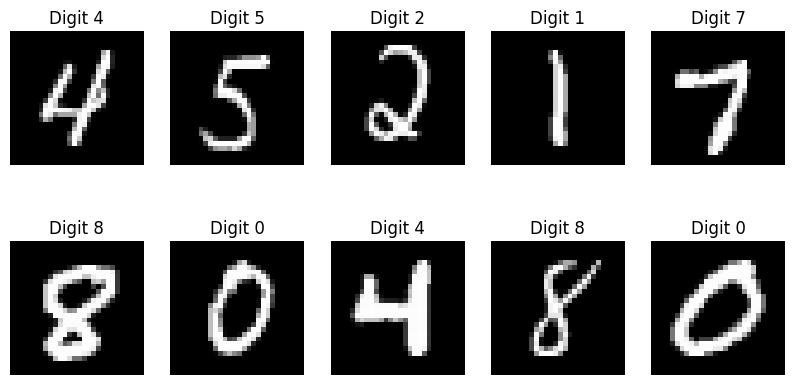

In [5]:
plt.figure(figsize=(10, 5))

for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digit_train_images[idx], cmap="gray")
    plt.axis("off")
    plt.title(f"Digit {digit_train_labels[idx]}")

plt.show()

In [6]:
num_samples = 10
random_indices = np.random.choice(digit_train_images.shape[0], num_samples, replace=False)

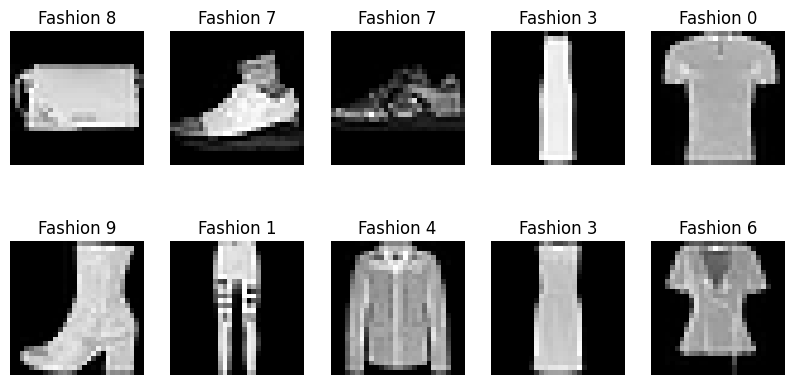

In [7]:
plt.figure(figsize=(10, 5))

for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(fashion_train_images[idx], cmap="gray")
    plt.axis("off")
    plt.title(f"Fashion {fashion_train_labels[idx]}")

plt.show()

In [8]:
classes_digits = np.unique(digit_train_labels)
print(f"Unique classes in MNIST Digits: {classes_digits}")
print(f"Number of classes: {len(classes_digits)}")

Unique classes in MNIST Digits: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


In [9]:
classes_fashion = np.unique(fashion_train_labels)
print(f"Unique classes in Fashion MNIST: {classes_fashion}")
print(f"Number of classes: {len(classes_fashion)}")

Unique classes in Fashion MNIST: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


# GANS for Digits

In [10]:
digit_train_images = (digit_train_images.astype(np.float32) - 127.5) / 127.5
digit_train_images = np.expand_dims(digit_train_images, axis=-1)
print(np.shape(digit_train_images))

(60000, 28, 28, 1)


In [11]:
buffer = digit_train_images.shape[0]
batch = 256

train_dataset = tf.data.Dataset.from_tensor_slices(digit_train_images).shuffle(buffer).batch(batch)

In [12]:
generator = keras.Sequential([
    layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    layers.Reshape((7, 7, 256)),

    layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding="same", use_bias=False, activation="tanh")
])

C:\Users\Zee Jay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
discriminator = keras.Sequential([
    layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same", input_shape=(28, 28, 1)),
    layers.LeakyReLU(),
    layers.Dropout(0.3),

    layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"),
    layers.LeakyReLU(),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(1, activation="sigmoid")
])

C:\Users\Zee Jay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
def discriminator_loss(real_output, fake_output):
    return -tf.reduce_mean(tf.math.log(real_output) + tf.math.log(1 - fake_output))

def generator_loss(fake_output):
    return -tf.reduce_mean(tf.math.log(fake_output))

In [15]:
generator_optimizer = keras.optimizers.Adam(0.0002, beta_1=0.5)
discriminator_optimizer = keras.optimizers.Adam(0.0002, beta_1=0.5)

In [10]:
def generate_images(model, test_input):
    predictions = model(test_input, training=False)
    predictions = (predictions + 1) / 2

    fig, axes = plt.subplots(2, 5, figsize=(5, 2))

    for i, ax in enumerate(axes.flat):
        ax.imshow(predictions[i, :, :, 0], cmap='gray')
        ax.axis('off')

    plt.show()

Epoch 1, Gen Loss: 0.6615, Disc Loss: 1.3204


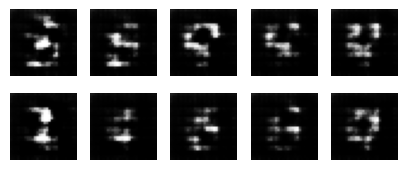

Epoch 2, Gen Loss: 0.7240, Disc Loss: 1.3548


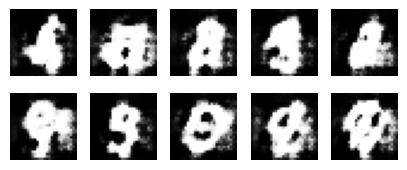

Epoch 3, Gen Loss: 0.7377, Disc Loss: 1.3469


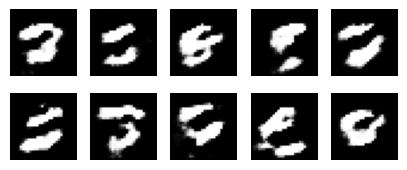

Epoch 4, Gen Loss: 0.7566, Disc Loss: 1.3298


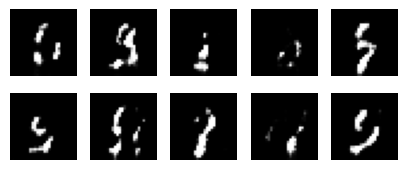

Epoch 5, Gen Loss: 0.7853, Disc Loss: 1.3052


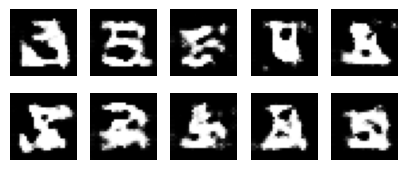

Epoch 6, Gen Loss: 0.8331, Disc Loss: 1.2579


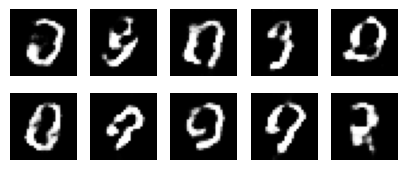

Epoch 7, Gen Loss: 0.8626, Disc Loss: 1.2397


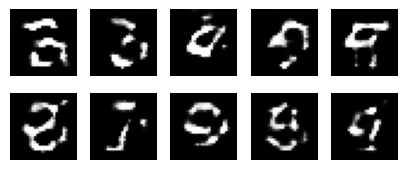

Epoch 8, Gen Loss: 0.8588, Disc Loss: 1.2547


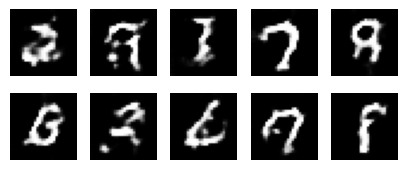

Epoch 9, Gen Loss: 0.8164, Disc Loss: 1.2955


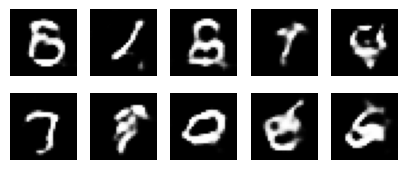

Epoch 10, Gen Loss: 0.7924, Disc Loss: 1.3155


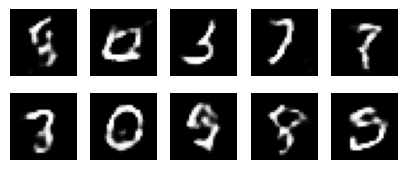

Epoch 11, Gen Loss: 0.7942, Disc Loss: 1.3165


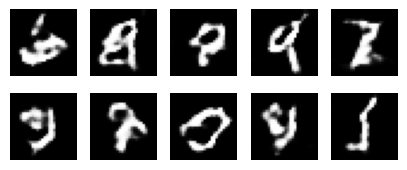

Epoch 12, Gen Loss: 0.7745, Disc Loss: 1.3259


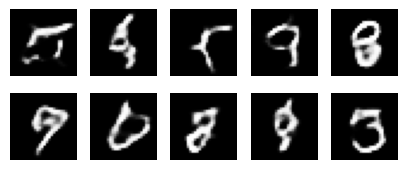

Epoch 13, Gen Loss: 0.7857, Disc Loss: 1.3247


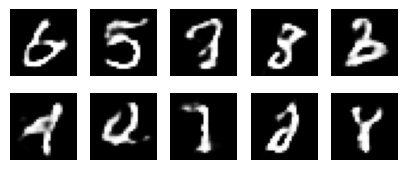

Epoch 14, Gen Loss: 0.7781, Disc Loss: 1.3245


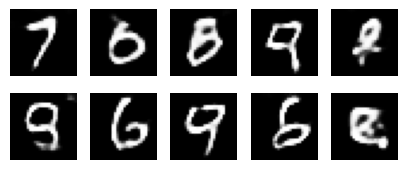

Epoch 15, Gen Loss: 0.7683, Disc Loss: 1.3297


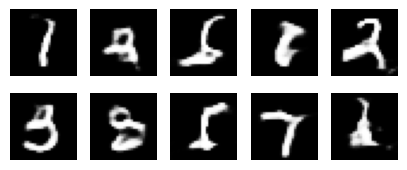

Epoch 16, Gen Loss: 0.7870, Disc Loss: 1.3193


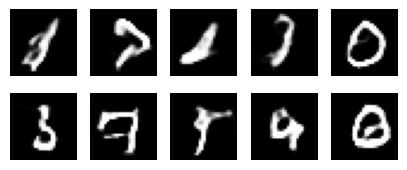

Epoch 17, Gen Loss: 0.7872, Disc Loss: 1.3220


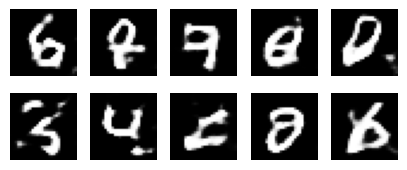

Epoch 18, Gen Loss: 0.7936, Disc Loss: 1.3143


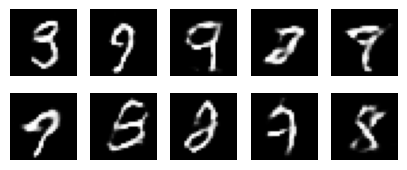

Epoch 19, Gen Loss: 0.7811, Disc Loss: 1.3182


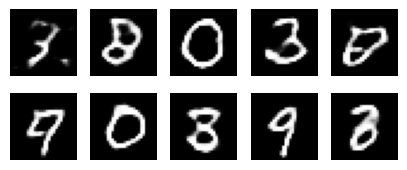

Epoch 20, Gen Loss: 0.7960, Disc Loss: 1.3113


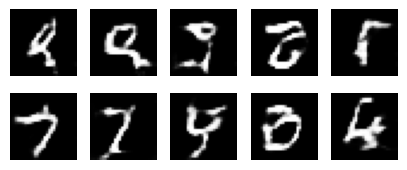

Epoch 21, Gen Loss: 0.7876, Disc Loss: 1.3123


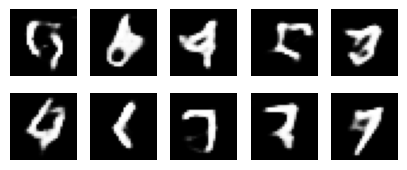

Epoch 22, Gen Loss: 0.7985, Disc Loss: 1.3113


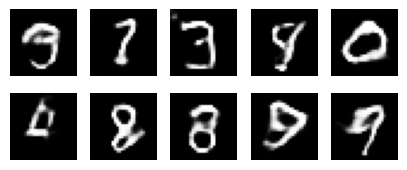

Epoch 23, Gen Loss: 0.7956, Disc Loss: 1.3125


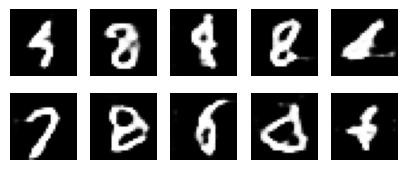

Epoch 24, Gen Loss: 0.8190, Disc Loss: 1.2936


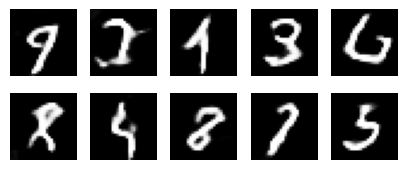

Epoch 25, Gen Loss: 0.8078, Disc Loss: 1.3014


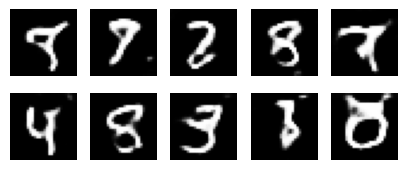

Epoch 26, Gen Loss: 0.8141, Disc Loss: 1.2996


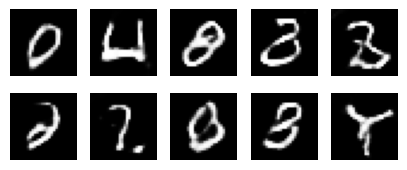

Epoch 27, Gen Loss: 0.8021, Disc Loss: 1.3064


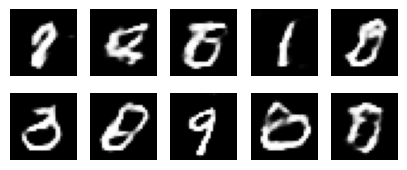

Epoch 28, Gen Loss: 0.8058, Disc Loss: 1.3034


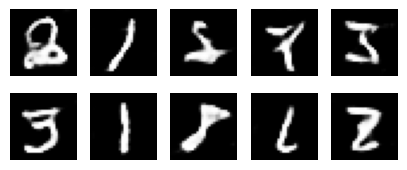

Epoch 29, Gen Loss: 0.8155, Disc Loss: 1.3001


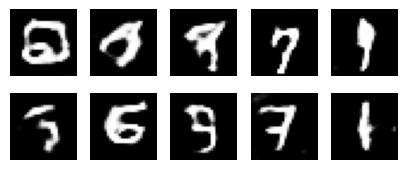

Epoch 30, Gen Loss: 0.8238, Disc Loss: 1.2952


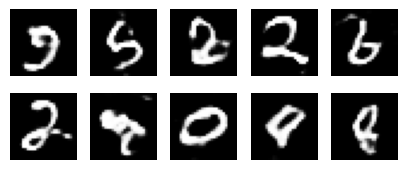

Epoch 31, Gen Loss: 0.8244, Disc Loss: 1.2915


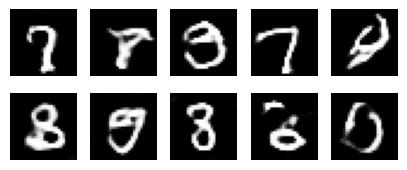

Epoch 32, Gen Loss: 0.8049, Disc Loss: 1.3006


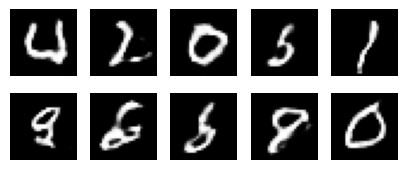

Epoch 33, Gen Loss: 0.8087, Disc Loss: 1.3052


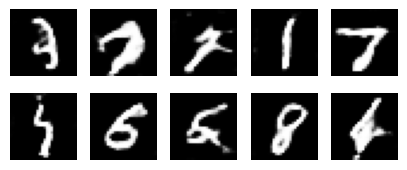

Epoch 34, Gen Loss: 0.8297, Disc Loss: 1.2959


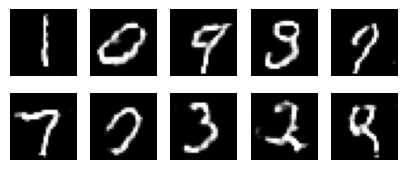

Epoch 35, Gen Loss: 0.8217, Disc Loss: 1.2982


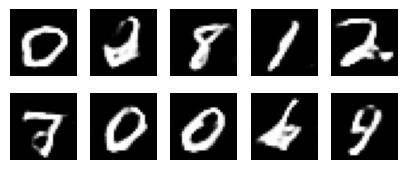

Epoch 36, Gen Loss: 0.8224, Disc Loss: 1.2980


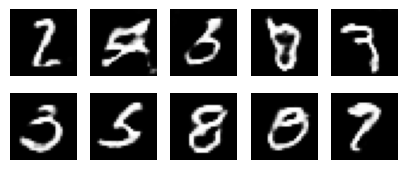

Epoch 37, Gen Loss: 0.8066, Disc Loss: 1.3031


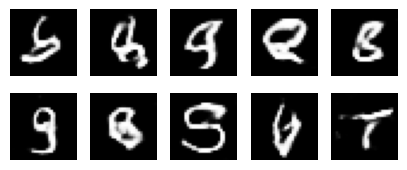

Epoch 38, Gen Loss: 0.8102, Disc Loss: 1.3052


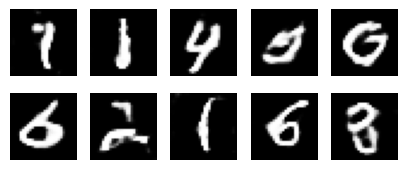

Epoch 39, Gen Loss: 0.8309, Disc Loss: 1.2945


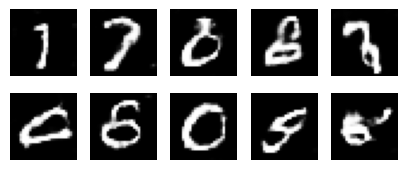

Epoch 40, Gen Loss: 0.8228, Disc Loss: 1.2994


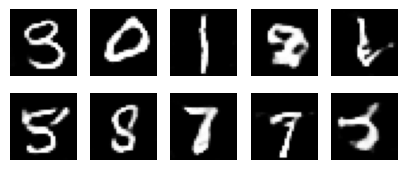

Epoch 41, Gen Loss: 0.8120, Disc Loss: 1.3050


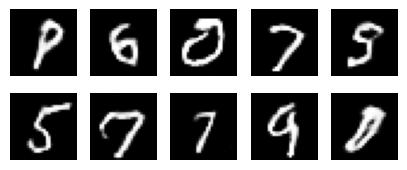

Epoch 42, Gen Loss: 0.8086, Disc Loss: 1.3056


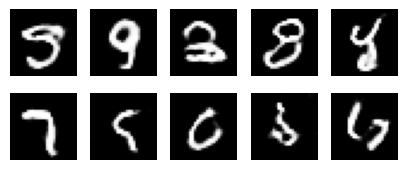

Epoch 43, Gen Loss: 0.8062, Disc Loss: 1.3082


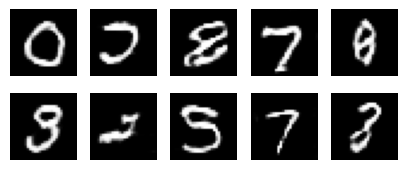

Epoch 44, Gen Loss: 0.8269, Disc Loss: 1.3047


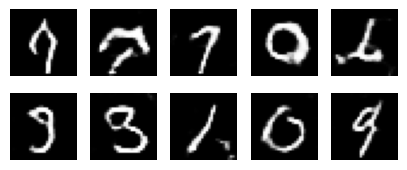

Epoch 45, Gen Loss: 0.8272, Disc Loss: 1.2987


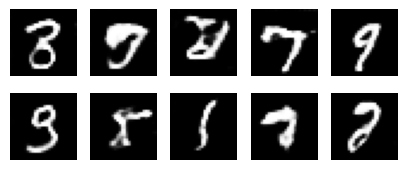

Epoch 46, Gen Loss: 0.8171, Disc Loss: 1.3011


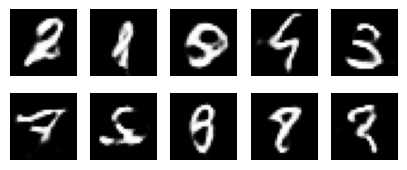

Epoch 47, Gen Loss: 0.8044, Disc Loss: 1.3065


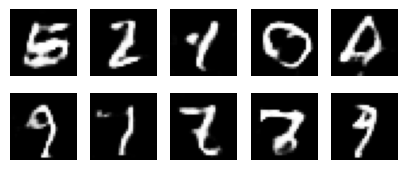

Epoch 48, Gen Loss: 0.8085, Disc Loss: 1.3105


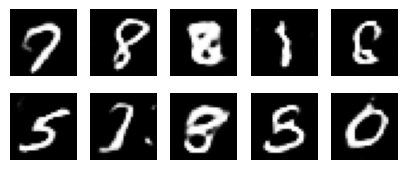

Epoch 49, Gen Loss: 0.8279, Disc Loss: 1.3051


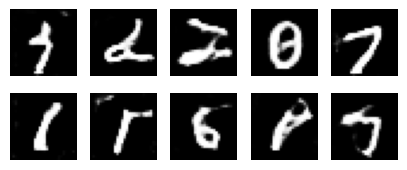

Epoch 50, Gen Loss: 0.8194, Disc Loss: 1.3007


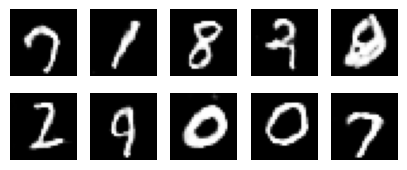

Epoch 51, Gen Loss: 0.8079, Disc Loss: 1.3078


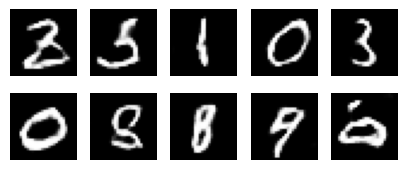

Epoch 52, Gen Loss: 0.8016, Disc Loss: 1.3104


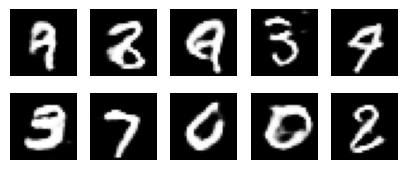

Epoch 53, Gen Loss: 0.8075, Disc Loss: 1.3118


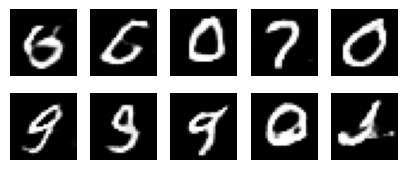

Epoch 54, Gen Loss: 0.8306, Disc Loss: 1.3018


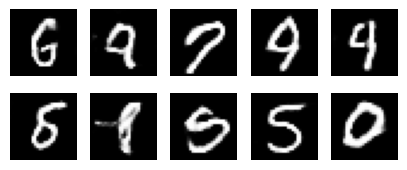

Epoch 55, Gen Loss: 0.8079, Disc Loss: 1.3090


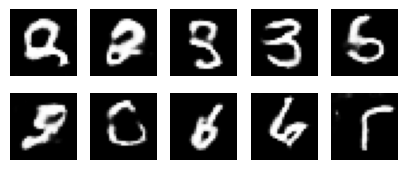

Epoch 56, Gen Loss: 0.7999, Disc Loss: 1.3109


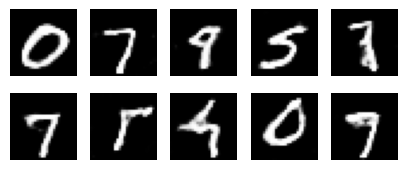

Epoch 57, Gen Loss: 0.8023, Disc Loss: 1.3126


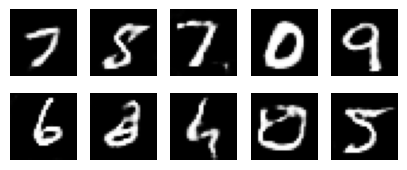

Epoch 58, Gen Loss: 0.8246, Disc Loss: 1.3083


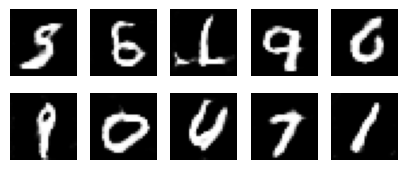

Epoch 59, Gen Loss: 0.8162, Disc Loss: 1.3088


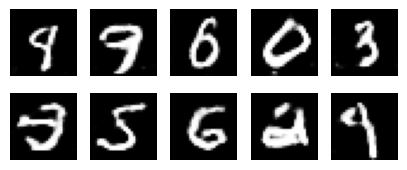

Epoch 60, Gen Loss: 0.8019, Disc Loss: 1.3108


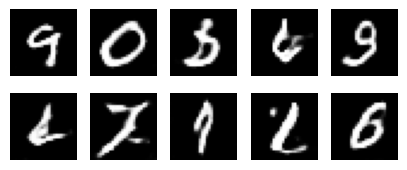

In [17]:
EPOCHS = 60
noise_dim = 100

@tf.function
def train_step(images):
    newbatch = len(images)
    noise = tf.random.normal([newbatch, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        g_loss = generator_loss(fake_output)
        d_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(d_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return g_loss, d_loss

def train(dataset, epochs):
    for epoch in range(epochs):
        g_loss_avg, d_loss_avg = 0, 0
        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
            g_loss_avg += g_loss
            d_loss_avg += d_loss

        print(f'Epoch {epoch+1}, Gen Loss: {g_loss_avg.numpy()/len(dataset):.4f}, Disc Loss: {d_loss_avg.numpy()/len(dataset):.4f}')
        seed = tf.random.normal([10, noise_dim])
        generate_images(generator, seed)

train(train_dataset, EPOCHS)


In [18]:
generator.save('mnist_digit_generator.h5')
discriminator.save('mnist_digit_discriminator.h5')

In [20]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 7, 7, 128)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 14, 14, 64)          │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │           1,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [21]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

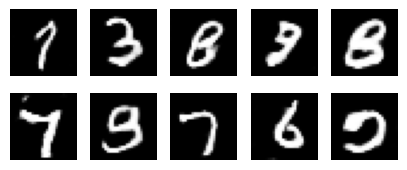

In [19]:
seed = tf.random.normal([10, noise_dim])
generate_images(generator, seed)

# Digits Classifier

In [12]:
classifier = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Zee Jay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
mnist_digits = tf.keras.datasets.mnist
(digit_train_images, digit_train_labels), (digit_test_images, digit_test_labels) = mnist_digits.load_data()

digit_train_labels = keras.utils.to_categorical(digit_train_labels,num_classes=10)
digit_test_labels = keras.utils.to_categorical(digit_test_labels,num_classes=10)

digit_train_images, digit_test_images = digit_train_images / 255.0, digit_test_images / 255.0

digit_train_images = np.expand_dims(digit_train_images, axis=-1)
digit_test_images = np.expand_dims(digit_test_images, axis=-1)

In [15]:
classifier.fit(digit_train_images, digit_train_labels, epochs=10, validation_data=(digit_test_images, digit_test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8657 - loss: 0.4245 - val_accuracy: 0.9864 - val_loss: 0.0423
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9766 - loss: 0.0785 - val_accuracy: 0.9899 - val_loss: 0.0325
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9829 - loss: 0.0586 - val_accuracy: 0.9921 - val_loss: 0.0246
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9874 - loss: 0.0451 - val_accuracy: 0.9917 - val_loss: 0.0259
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9892 - loss: 0.0344 - val_accuracy: 0.9909 - val_loss: 0.0314
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9908 - loss: 0.0296 - val_accuracy: 0.9919 - val_loss: 0.0281
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.9922 - val_loss: 0.0255
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9917 - loss: 0.0267 - 

In [ ]:
classifier.save('mnist_digit_classifier.h5')

In [10]:
def classify_generated_images(images, classifier):
    predictions = classifier.predict(images)  # Get one-hot encoded predictions
    predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot to class index
    return predicted_labels

In [11]:
def display_digit_3_images(generator, classifier, num_samples=50, num_display=5):
    generated_images = generator_images(generator, num_samples)
    predicted_labels = classify_generated_images(generated_images, classifier)
    digit_3_indices = np.where(predicted_labels == 3)[0]

    selected_images = tf.gather(generated_images, digit_3_indices[:num_display])

    fig, axes = plt.subplots(1, len(selected_images), figsize=(10, 2))
    for i, ax in enumerate(axes.flat):
        ax.imshow(selected_images[i, :, :, 0], cmap='gray')
        ax.axis('off')

    plt.show()

In [12]:
def generator_images(model, num_samples=50):
    noise_dim = 100
    noise = tf.random.normal([num_samples, noise_dim])
    generated_images = model(noise, training=False)
    generated_images = (generated_images + 1) / 2
    return generated_images

In [13]:
mnist_generator = tf.keras.models.load_model('mnist_digit_generator.h5')
mnist_classifier = tf.keras.models.load_model('mnist_digit_classifier.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


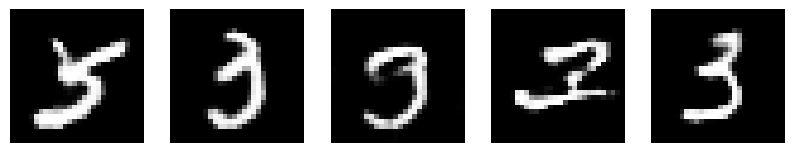

In [15]:
display_digit_3_images(mnist_generator, mnist_classifier, num_samples=50, num_display=5)

# GANS for Fashion

In [16]:
selected_label = 7
filtered_indices = np.where(fashion_train_labels == selected_label)[0]
fashion_train_Sneaker = fashion_train_images[filtered_indices]
fashion_train_Sneaker_labels = fashion_train_labels[filtered_indices]

In [17]:
fashion_train_Sneaker = (fashion_train_Sneaker.astype(np.float32) - 127.5) / 127.5
fashion_train_Sneaker = np.expand_dims(fashion_train_Sneaker, axis=-1)
print(np.shape(fashion_train_Sneaker))

(6000, 28, 28, 1)


In [18]:
buffer = fashion_train_Sneaker.shape[0]
batch = 256

train_dataset = tf.data.Dataset.from_tensor_slices(fashion_train_Sneaker).shuffle(buffer).batch(batch)

In [19]:
generator = keras.Sequential([
    layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    layers.Reshape((7, 7, 256)),

    layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding="same", use_bias=False, activation="tanh")
])

C:\Users\Zee Jay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
discriminator = keras.Sequential([
    layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same", input_shape=(28, 28, 1)),
    layers.LeakyReLU(),
    layers.Dropout(0.3),

    layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"),
    layers.LeakyReLU(),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(1, activation="sigmoid")
])

C:\Users\Zee Jay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
def discriminator_loss(real_output, fake_output):
    return -tf.reduce_mean(tf.math.log(real_output) + tf.math.log(1 - fake_output))

def generator_loss(fake_output):
    return -tf.reduce_mean(tf.math.log(fake_output))

In [22]:
generator_optimizer = keras.optimizers.Adam(0.0002, beta_1=0.5)
discriminator_optimizer = keras.optimizers.Adam(0.0002, beta_1=0.5)

In [23]:
def generate_images(model, test_input):
    predictions = model(test_input, training=False)
    predictions = (predictions + 1) / 2

    fig, axes = plt.subplots(2, 5, figsize=(5, 2))

    for i, ax in enumerate(axes.flat):
        ax.imshow(predictions[i, :, :, 0], cmap='gray')
        ax.axis('off')

    plt.show()

Epoch 1, Gen Loss: 0.5563, Disc Loss: 1.2013


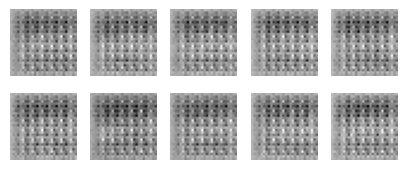

Epoch 2, Gen Loss: 0.6116, Disc Loss: 1.2790


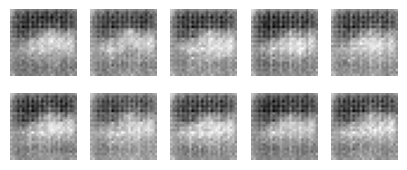

Epoch 3, Gen Loss: 0.6277, Disc Loss: 1.4175


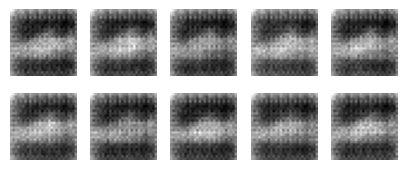

Epoch 4, Gen Loss: 0.6611, Disc Loss: 1.4100


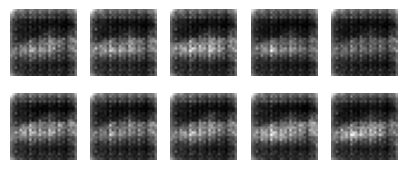

Epoch 5, Gen Loss: 0.6721, Disc Loss: 1.3866


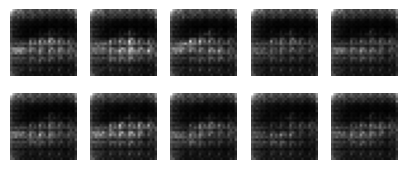

Epoch 6, Gen Loss: 0.6711, Disc Loss: 1.3996


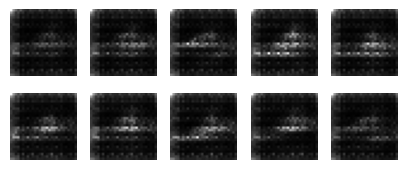

Epoch 7, Gen Loss: 0.6856, Disc Loss: 1.3938


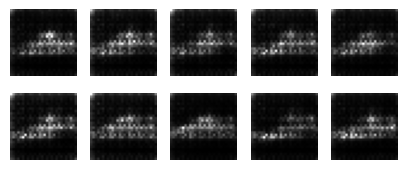

Epoch 8, Gen Loss: 0.6944, Disc Loss: 1.3899


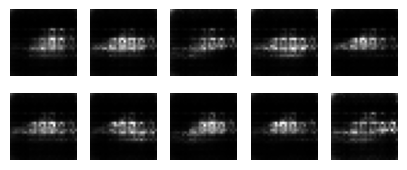

Epoch 9, Gen Loss: 0.6953, Disc Loss: 1.3843


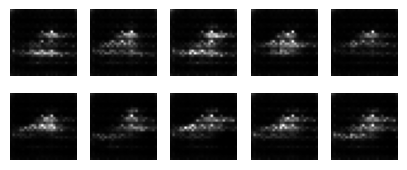

Epoch 10, Gen Loss: 0.6762, Disc Loss: 1.3991


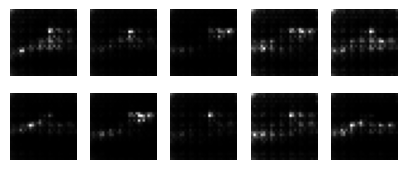

Epoch 11, Gen Loss: 0.6893, Disc Loss: 1.3828


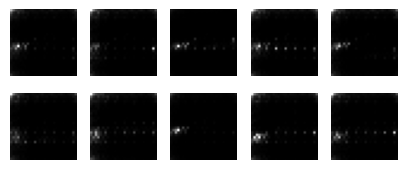

Epoch 12, Gen Loss: 0.6881, Disc Loss: 1.4032


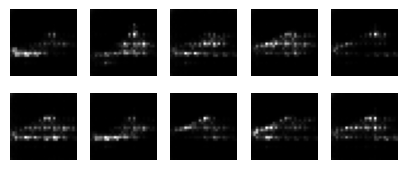

Epoch 13, Gen Loss: 0.7002, Disc Loss: 1.3798


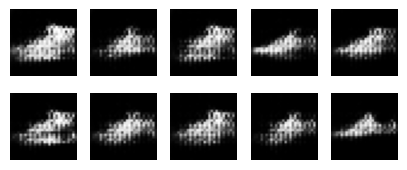

Epoch 14, Gen Loss: 0.7013, Disc Loss: 1.3835


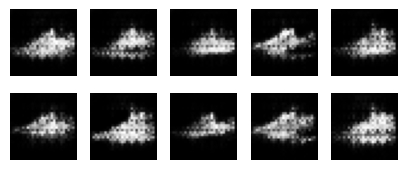

Epoch 15, Gen Loss: 0.6848, Disc Loss: 1.3854


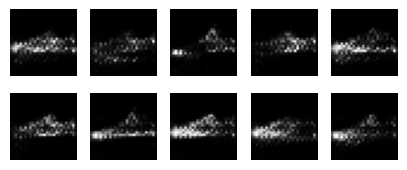

Epoch 16, Gen Loss: 0.6994, Disc Loss: 1.3884


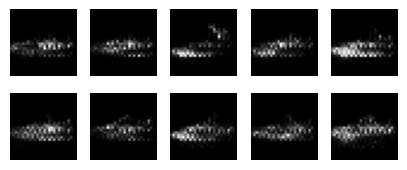

Epoch 17, Gen Loss: 0.6851, Disc Loss: 1.3939


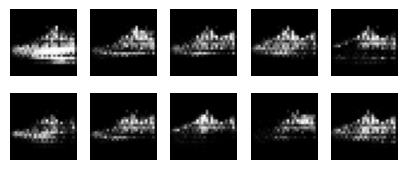

Epoch 18, Gen Loss: 0.7007, Disc Loss: 1.3814


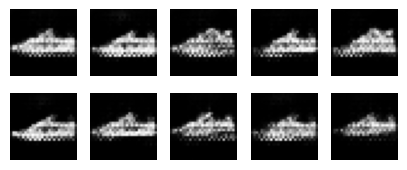

Epoch 19, Gen Loss: 0.7152, Disc Loss: 1.3821


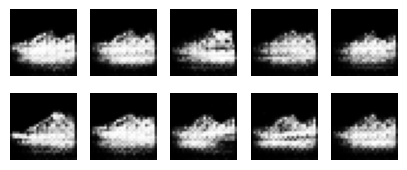

Epoch 20, Gen Loss: 0.6893, Disc Loss: 1.3829


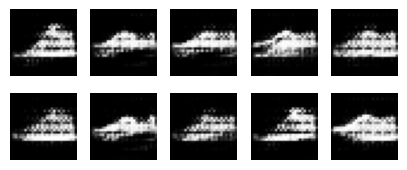

Epoch 21, Gen Loss: 0.6904, Disc Loss: 1.3963


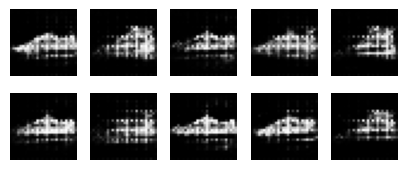

Epoch 22, Gen Loss: 0.6943, Disc Loss: 1.3871


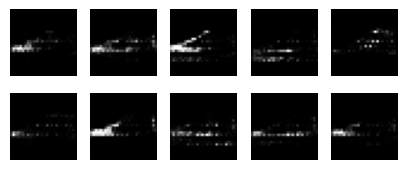

Epoch 23, Gen Loss: 0.6883, Disc Loss: 1.3930


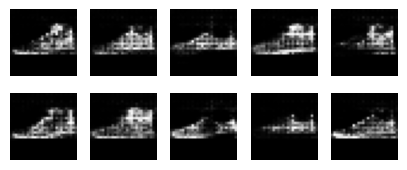

Epoch 24, Gen Loss: 0.6889, Disc Loss: 1.3843


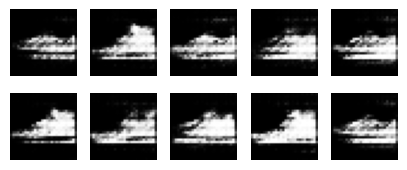

Epoch 25, Gen Loss: 0.7101, Disc Loss: 1.3826


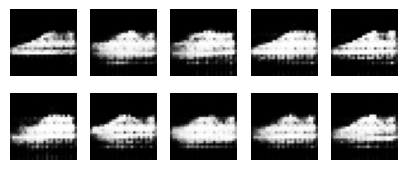

Epoch 26, Gen Loss: 0.6837, Disc Loss: 1.3774


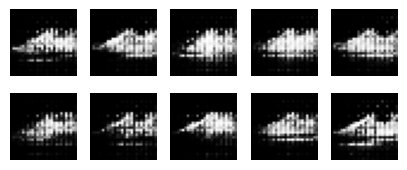

Epoch 27, Gen Loss: 0.6951, Disc Loss: 1.3828


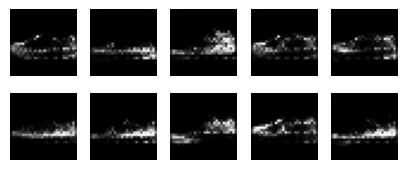

Epoch 28, Gen Loss: 0.6963, Disc Loss: 1.4015


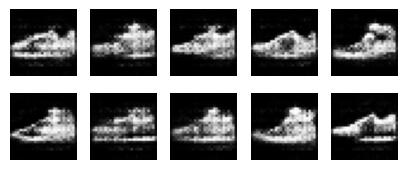

Epoch 29, Gen Loss: 0.6789, Disc Loss: 1.3830


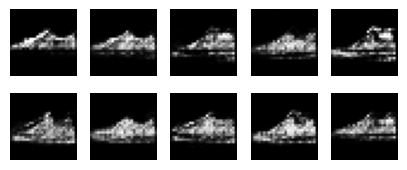

Epoch 30, Gen Loss: 0.7158, Disc Loss: 1.3969


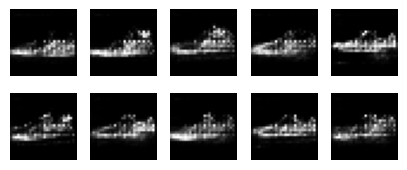

Epoch 31, Gen Loss: 0.6903, Disc Loss: 1.3839


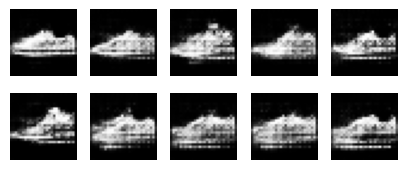

Epoch 32, Gen Loss: 0.7062, Disc Loss: 1.3883


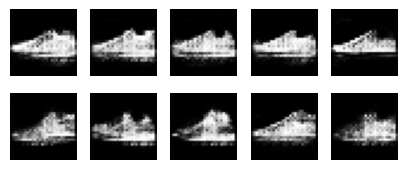

Epoch 33, Gen Loss: 0.6800, Disc Loss: 1.3920


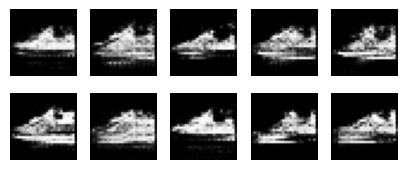

Epoch 34, Gen Loss: 0.6965, Disc Loss: 1.3889


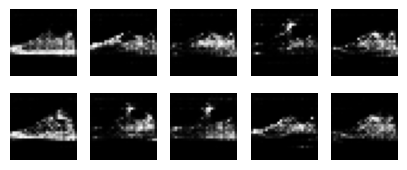

Epoch 35, Gen Loss: 0.6996, Disc Loss: 1.3879


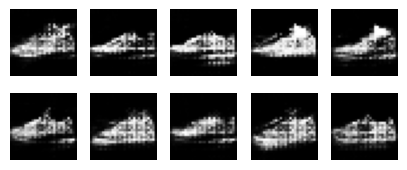

Epoch 36, Gen Loss: 0.6788, Disc Loss: 1.3840


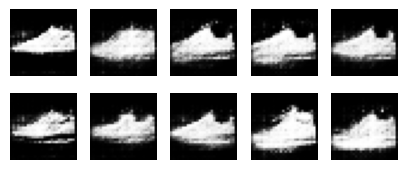

Epoch 37, Gen Loss: 0.6971, Disc Loss: 1.3930


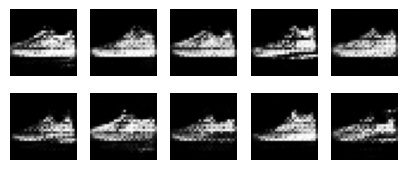

Epoch 38, Gen Loss: 0.7059, Disc Loss: 1.3877


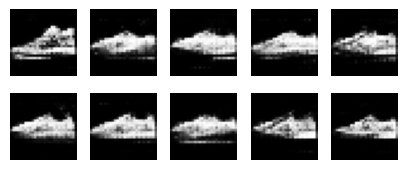

Epoch 39, Gen Loss: 0.6901, Disc Loss: 1.3847


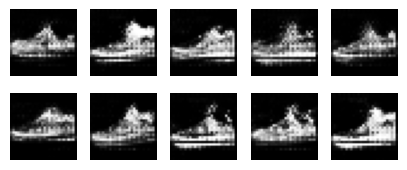

Epoch 40, Gen Loss: 0.6923, Disc Loss: 1.3948


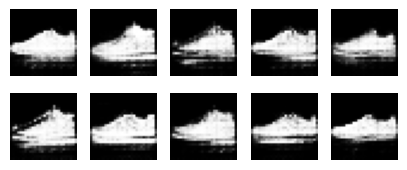

Epoch 41, Gen Loss: 0.7048, Disc Loss: 1.3682


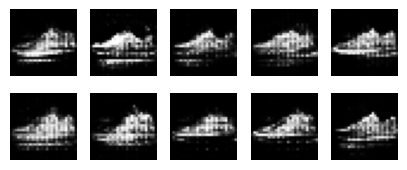

Epoch 42, Gen Loss: 0.6784, Disc Loss: 1.3993


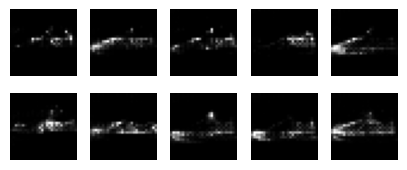

Epoch 43, Gen Loss: 0.7005, Disc Loss: 1.3848


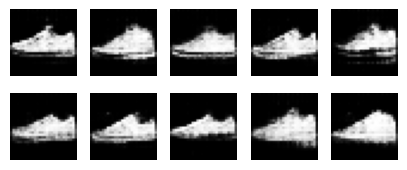

Epoch 44, Gen Loss: 0.7017, Disc Loss: 1.3860


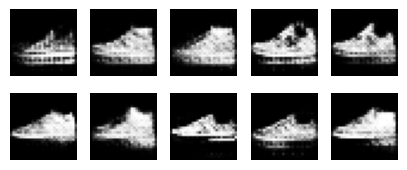

Epoch 45, Gen Loss: 0.6747, Disc Loss: 1.4012


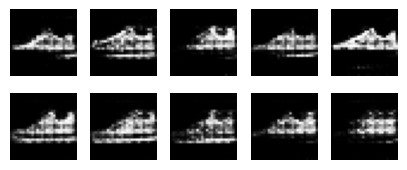

Epoch 46, Gen Loss: 0.6975, Disc Loss: 1.3890


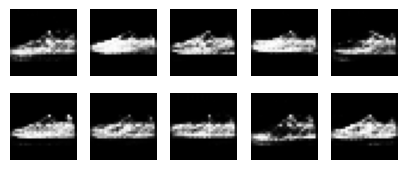

Epoch 47, Gen Loss: 0.7039, Disc Loss: 1.3790


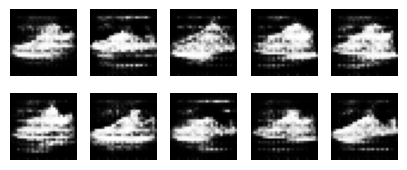

Epoch 48, Gen Loss: 0.6884, Disc Loss: 1.3837


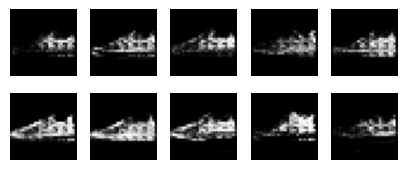

Epoch 49, Gen Loss: 0.7147, Disc Loss: 1.3859


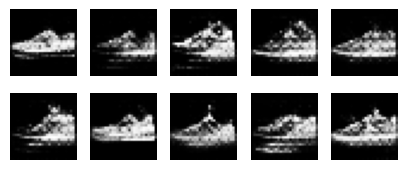

Epoch 50, Gen Loss: 0.6711, Disc Loss: 1.3869


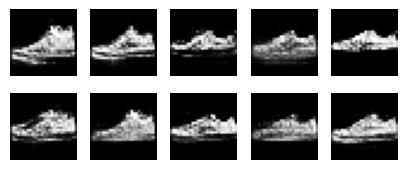

Epoch 51, Gen Loss: 0.6999, Disc Loss: 1.3895


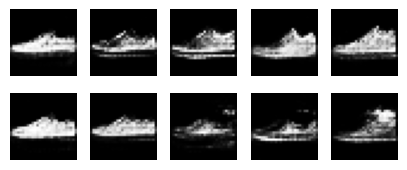

Epoch 52, Gen Loss: 0.6953, Disc Loss: 1.3882


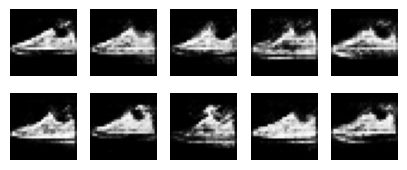

Epoch 53, Gen Loss: 0.6880, Disc Loss: 1.3792


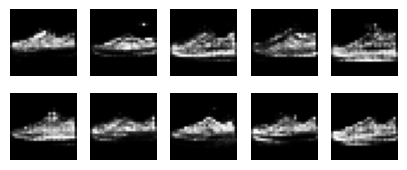

Epoch 54, Gen Loss: 0.7052, Disc Loss: 1.3999


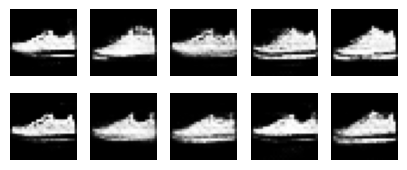

Epoch 55, Gen Loss: 0.7053, Disc Loss: 1.3608


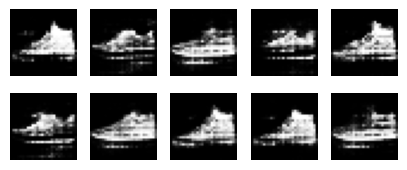

Epoch 56, Gen Loss: 0.6743, Disc Loss: 1.3984


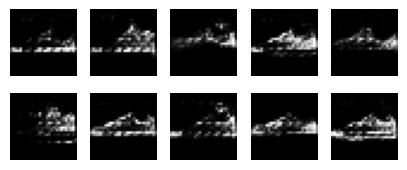

Epoch 57, Gen Loss: 0.7008, Disc Loss: 1.3934


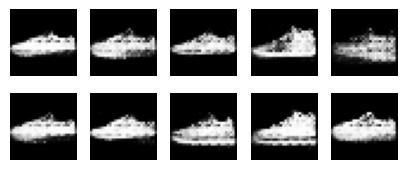

Epoch 58, Gen Loss: 0.7052, Disc Loss: 1.3683


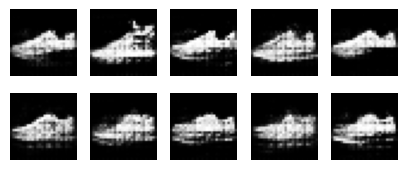

Epoch 59, Gen Loss: 0.6894, Disc Loss: 1.3882


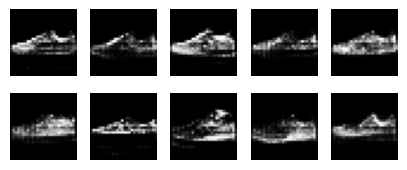

Epoch 60, Gen Loss: 0.7025, Disc Loss: 1.3966


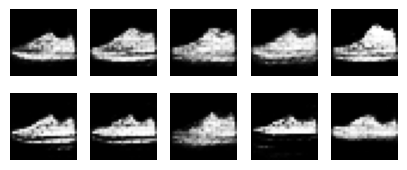

In [24]:
EPOCHS = 60
noise_dim = 100

@tf.function
def train_step(images):
    newbatch = len(images)
    noise = tf.random.normal([newbatch, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        g_loss = generator_loss(fake_output)
        d_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(d_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return g_loss, d_loss

def train(dataset, epochs):
    for epoch in range(epochs):
        g_loss_avg, d_loss_avg = 0, 0
        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
            g_loss_avg += g_loss
            d_loss_avg += d_loss

        print(f'Epoch {epoch+1}, Gen Loss: {g_loss_avg.numpy()/len(dataset):.4f}, Disc Loss: {d_loss_avg.numpy()/len(dataset):.4f}')
        seed = tf.random.normal([10, noise_dim])
        generate_images(generator, seed)

train(train_dataset, EPOCHS)


In [25]:
generator.save('mnist_fashion_generator.h5')
discriminator.save('mnist_fashion_discriminator.h5')

In [26]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 7, 7, 128)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 14, 14, 64)          │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │           1,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [27]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

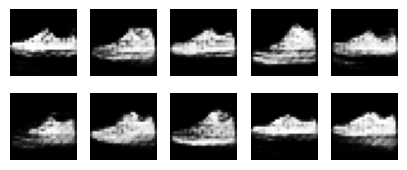

In [28]:
seed = tf.random.normal([10, noise_dim])
generate_images(generator, seed)

# VAE for Digits

In [131]:
latent_dim = 10

encoder = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), strides=2, padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), strides=2, padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(latent_dim * 2)
])

encoder.summary()

C:\Users\Zee Jay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 20)                  │          62,740 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,556 (318.58 KB)

 Trainable params: 81,556 (318.58 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
def sample_latent_space(latent_vector):
    mu, logvar = tf.split(latent_vector, num_or_size_splits=2, axis=1)
    eps = tf.random.normal(shape=tf.shape(mu))
    return mu + tf.exp(0.5 * logvar) * eps, mu, logvar

In [11]:
decoder = tf.keras.Sequential([
    layers.Dense(7 * 7 * 64, activation='relu', input_shape=(latent_dim,)),
    layers.Reshape((7, 7, 64)),
    layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
    layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
    layers.Conv2DTranspose(1, (3, 3), strides=1, padding='same')
])

decoder.summary()

NameError: name 'latent_dim' is not defined

In [ ]:
def vae_model(x):
    latent_vector = encoder(x)
    z, mu, logvar = sample_latent_space(latent_vector)
    reconstructed_x = decoder(z)
    return reconstructed_x, mu, logvar

In [135]:
def vae_loss(x, x_recon, mu, logvar, beta = 0.0001):
    bce_loss = tf.keras.losses.BinaryCrossentropy()(x, x_recon)
    kl_div = -0.5 * tf.reduce_sum(1 + logvar - tf.square(mu) - tf.exp(logvar), axis=-1)
    return tf.reduce_mean(bce_loss + beta * kl_div)

In [4]:
mnist_digits = tf.keras.datasets.mnist
(digit_train_images, digit_train_labels), (digit_test_images, digit_test_labels) = mnist_digits.load_data()

In [5]:
digit_train_images1 = np.expand_dims(digit_train_images.astype("float32") / 255.0, axis=-1)
digit_test_images1 = np.expand_dims(digit_test_images.astype("float32") / 255.0, axis=-1)
digit_train_images = np.where(digit_train_images1 > .5, 1.0, 0.0).astype('float32')
digit_test_images = np.where(digit_test_images1 > .5, 1.0, 0.0).astype('float32')

batch = 256

In [122]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

@tf.function
def train_step(x):
    with tf.GradientTape() as tape:
        x_recon, mu, logvar = vae_model(x)
        loss = vae_loss(x, x_recon, mu, logvar)
    gradients = tape.gradient(loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer.apply_gradients(zip(gradients, encoder.trainable_variables + decoder.trainable_variables))
    return loss

EPOCHS = 10
dataset = tf.data.Dataset.from_tensor_slices(digit_train_images).shuffle(60000).batch(batch)

for epoch in range(EPOCHS):
    for x_batch in dataset:
        loss = train_step(x_batch)
    print(f"Epoch {epoch + 1}, Loss: {loss.numpy():.4f}")


Epoch 1, Loss: 0.1166
Epoch 2, Loss: 0.1249
Epoch 3, Loss: 0.1207
Epoch 4, Loss: 0.1176
Epoch 5, Loss: 0.1162
Epoch 6, Loss: 0.1295
Epoch 7, Loss: 0.1190
Epoch 8, Loss: 0.1142
Epoch 9, Loss: 0.1209
Epoch 10, Loss: 0.1234


In [123]:
encoder.save("vae_encoder.h5")
decoder.save("vae_decoder.h5")

In [2]:
encoder = tf.keras.models.load_model("vae_encoder.h5")
decoder = tf.keras.models.load_model("vae_decoder.h5")

In [15]:
num_samples = 1000
sample_images = digit_train_images[:num_samples]

latent_vector = encoder(sample_images)
z, mu, logvar = sample_latent_space(latent_vector)

z = z.numpy()

pca = PCA(n_components=2)
z_pca = pca.fit_transform(z)

plt.figure(figsize=(8, 6))
plt.scatter(z_pca[:, 0], z_pca[:, 1], alpha=0.6, cmap='viridis')
plt.colorbar()
plt.title("PCA Visualization of Latent Space")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


NameError: name 'sample_latent_space' is not defined

In [126]:
num_samples = 10
random_latent_vectors = tf.random.normal(shape=(num_samples, latent_dim))
generated_images = decoder(random_latent_vectors)

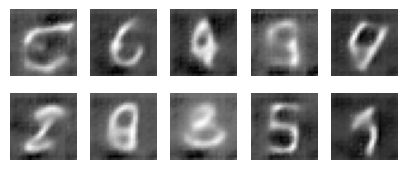

In [127]:
fig, axes = plt.subplots(2, 5, figsize=(5, 2))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i, :, :, 0], cmap='gray')
    ax.axis('off')

plt.show()

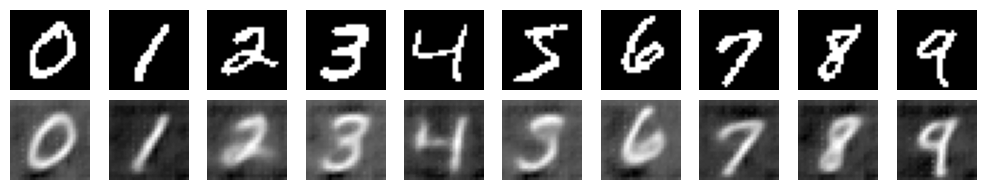

In [129]:
unique_classes = np.unique(digit_train_labels)
selected_images = []

for label in unique_classes:
    index = np.where(digit_train_labels == label)[0][0]
    selected_images.append(digit_train_images[index])

selected_images = np.array(selected_images)

latent_vectors = encoder(selected_images)

z, mu, logvar = sample_latent_space(latent_vectors)

reconstructed_images = decoder(z, training=False)

fig, axes = plt.subplots(2, 10, figsize=(10, 2))

for i in range(10):
    axes[0, i].imshow(selected_images[i, :, :, 0], cmap='gray')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(reconstructed_images[i, :, :, 0], cmap='gray')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [17]:
latent_vectors = []
labels = []

class_counts = {i: 0 for i in range(10)}

for i in range(len(digit_train_images)):  
    if class_counts[digit_train_labels[i]] < 20:
        x = np.expand_dims(digit_train_images1[i], axis=0)
        latent_vector = encoder.predict(x)

        z, mu, logvar = sample_latent_space(latent_vector)
        
        latent_vectors.append(z.numpy())
        labels.append(digit_train_labels[i])

        class_counts[digit_train_labels[i]] += 1

latent_vectors = np.vstack(latent_vectors)
labels = np.array(labels)

np.save("latent_vectors.npy", latent_vectors)
np.save("labels.npy", labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


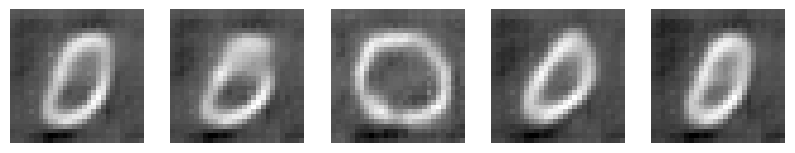

In [24]:
def generate_specific_digit(target_digit, num_samples=5):
    latent_vectors = np.load("latent_vectors.npy")
    labels = np.load("labels.npy")

    digit_latents = latent_vectors[labels == target_digit]

    if len(digit_latents) == 0:
        return None

    selected_latents = digit_latents[np.random.choice(len(digit_latents), num_samples, replace=False)]
    generated_images = decoder.predict(selected_latents)

    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i, img in enumerate(generated_images):
        axes[i].imshow(img.squeeze(), cmap="gray")
        axes[i].axis("off")
    plt.show()

generate_specific_digit(0, num_samples=5)

C:\Users\Zee Jay\AppData\Local\Temp\ipykernel_3312\2705843846.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_pca[:, 0], z_pca[:, 1], alpha=0.6, cmap='viridis')


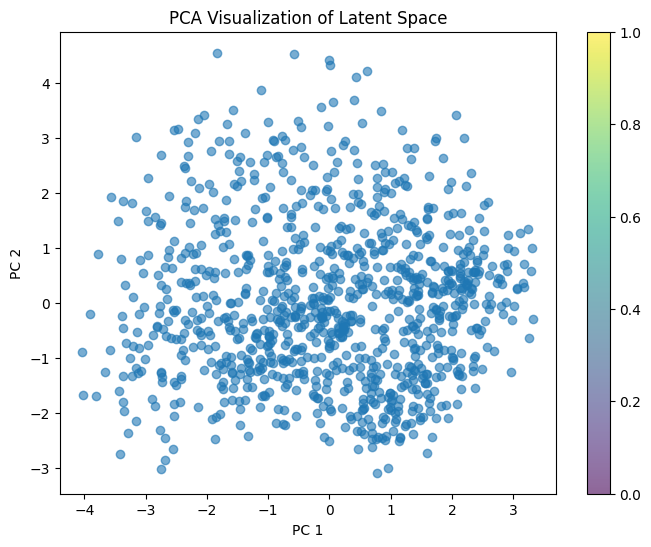

In [6]:
num_samples = 1000
sample_images = digit_train_images[:num_samples]

latent_vector = encoder(sample_images)
z, mu, logvar = sample_latent_space(latent_vector)

z = z.numpy()

pca = PCA(n_components=2)
z_pca = pca.fit_transform(z)

plt.figure(figsize=(8, 6))
plt.scatter(z_pca[:, 0], z_pca[:, 1], alpha=0.6, cmap='viridis')
plt.colorbar()
plt.title("PCA Visualization of Latent Space")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


# VAE for Fashion

In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(digit_train_images, digit_train_labels), (digit_test_images, digit_test_labels) = fashion_mnist.load_data()

In [26]:
digit_train_images1 = np.expand_dims(digit_train_images.astype("float32") / 255.0, axis=-1)
digit_test_images1 = np.expand_dims(digit_test_images.astype("float32") / 255.0, axis=-1)
digit_train_images = np.where(digit_train_images1 > 0.5, 1.0, 0.0).astype('float32')
digit_test_images = np.where(digit_test_images1 > 0.5, 1.0, 0.0).astype('float32')

batch = 256

In [157]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

@tf.function
def train_step(x):
    with tf.GradientTape() as tape:
        x_recon, mu, logvar = vae_model(x)
        loss = vae_loss(x, x_recon, mu, logvar)
    gradients = tape.gradient(loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer.apply_gradients(zip(gradients, encoder.trainable_variables + decoder.trainable_variables))
    return loss

EPOCHS = 50
dataset = tf.data.Dataset.from_tensor_slices(digit_train_images).shuffle(60000).batch(batch)

for epoch in range(EPOCHS):
    for x_batch in dataset:
        loss = train_step(x_batch)
    print(f"Epoch {epoch + 1}, Loss: {loss.numpy():.4f}")

Epoch 1, Loss: 0.1624
Epoch 2, Loss: 0.1673
Epoch 3, Loss: 0.1803
Epoch 4, Loss: 0.1773
Epoch 5, Loss: 0.2044
Epoch 6, Loss: 0.2072
Epoch 7, Loss: 0.1704
Epoch 8, Loss: 0.1821
Epoch 9, Loss: 0.1976
Epoch 10, Loss: 0.1760
Epoch 11, Loss: 0.1924
Epoch 12, Loss: 0.1712
Epoch 13, Loss: 0.1754
Epoch 14, Loss: 0.1699
Epoch 15, Loss: 0.3934
Epoch 16, Loss: 0.1848
Epoch 17, Loss: 0.1736
Epoch 18, Loss: 0.1706
Epoch 19, Loss: 0.1780
Epoch 20, Loss: 0.1961
Epoch 21, Loss: 0.1706
Epoch 22, Loss: 0.1867
Epoch 23, Loss: 0.1684
Epoch 24, Loss: 0.2729
Epoch 25, Loss: 0.1836
Epoch 26, Loss: 0.1800
Epoch 27, Loss: 0.1690
Epoch 28, Loss: 0.1640
Epoch 29, Loss: 0.1780
Epoch 30, Loss: 0.1758
Epoch 31, Loss: 0.1705
Epoch 32, Loss: 0.2054
Epoch 33, Loss: 0.1607
Epoch 34, Loss: 0.1891
Epoch 35, Loss: 0.1666
Epoch 36, Loss: 0.1723
Epoch 37, Loss: 0.1864
Epoch 38, Loss: 0.1743
Epoch 39, Loss: 0.1764
Epoch 40, Loss: 0.1641
Epoch 41, Loss: 0.1743
Epoch 42, Loss: 0.1620
Epoch 43, Loss: 0.1630
Epoch 44, Loss: 0.18

In [151]:
encoder.save("fvae_encoder.h5")
decoder.save("fvae_decoder.h5")

In [13]:
encoder = tf.keras.models.load_model("fvae_encoder.h5")
decoder = tf.keras.models.load_model("fvae_decoder.h5")

C:\Users\Zee Jay\AppData\Local\Temp\ipykernel_10264\2705843846.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(z_pca[:, 0], z_pca[:, 1], alpha=0.6, cmap='viridis')


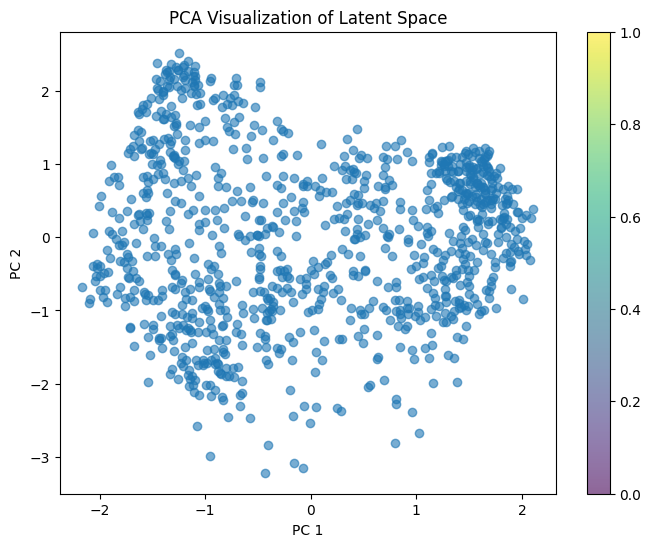

In [158]:
num_samples = 1000
sample_images = digit_train_images[:num_samples]

latent_vector = encoder(sample_images)
z, mu, logvar = sample_latent_space(latent_vector)

z = z.numpy()

pca = PCA(n_components=2)
z_pca = pca.fit_transform(z)

plt.figure(figsize=(8, 6))
plt.scatter(z_pca[:, 0], z_pca[:, 1], alpha=0.6, cmap='viridis')
plt.colorbar()
plt.title("PCA Visualization of Latent Space")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


In [159]:
num_samples = 10
random_latent_vectors = tf.random.normal(shape=(num_samples, latent_dim))
generated_images = decoder(random_latent_vectors)

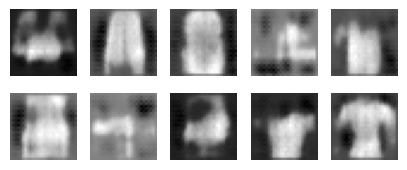

In [160]:
fig, axes = plt.subplots(2, 5, figsize=(5, 2))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i, :, :, 0], cmap='gray')
    ax.axis('off')

plt.show()

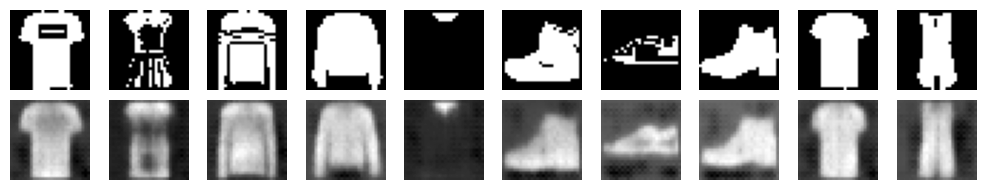

In [161]:
unique_classes = np.unique(digit_train_labels)
selected_images = []

for label in unique_classes:
    index = np.where(digit_train_labels == label)[0][0]
    selected_images.append(digit_train_images[index])

selected_images = np.array(selected_images)

latent_vectors = encoder(selected_images)

z, mu, logvar = sample_latent_space(latent_vectors)

reconstructed_images = decoder(z, training=False)

fig, axes = plt.subplots(2, 10, figsize=(10, 2))

for i in range(10):
    axes[0, i].imshow(selected_images[i, :, :, 0], cmap='gray')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(reconstructed_images[i, :, :, 0], cmap='gray')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [14]:
latent_vectors = []
labels = []

class_counts = {i: 0 for i in range(10)}

for i in range(len(digit_train_images)):  
    if class_counts[digit_train_labels[i]] < 20:
        x = np.expand_dims(digit_train_images1[i], axis=0)
        latent_vector = encoder.predict(x)

        z, mu, logvar = sample_latent_space(latent_vector)
        
        latent_vectors.append(z.numpy())
        labels.append(digit_train_labels[i])

        class_counts[digit_train_labels[i]] += 1

latent_vectors = np.vstack(latent_vectors)
labels = np.array(labels)

np.save("flatent_vectors.npy", latent_vectors)
np.save("flabels.npy", labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


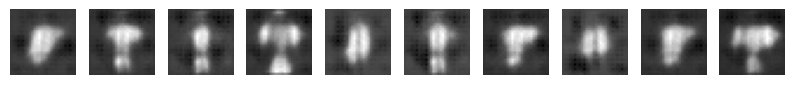

In [19]:
def generate_specific_digit(target_digit, num_samples=5):
    latent_vectors = np.load("flatent_vectors.npy")
    labels = np.load("flabels.npy")

    digit_latents = latent_vectors[labels == target_digit]

    if len(digit_latents) == 0:
        return None

    selected_latents = digit_latents[np.random.choice(len(digit_latents), num_samples, replace=False)]
    generated_images = decoder.predict(selected_latents)

    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i, img in enumerate(generated_images):
        axes[i].imshow(img.squeeze(), cmap="gray")
        axes[i].axis("off")
    plt.show()

generate_specific_digit(7, num_samples=10)

# PART 4

Two popular generating models, GANs and VAEs, each have special advantages and disadvantages. Because the discriminator motivates the generator to produce high-quality pictures, GANs generate images that are sharper and more lifelike. Mode collapse, which happens when the generator produces only a limited number of variations, is a common problem with them. In contrast, VAEs probabilistic approach enhances both reconstruction loss and KL divergence, resulting in smoother but blurrier images. When compared to GAN, VAEs are unable to provide fine details, even if they are able to capture a large variety of data variations.
Another important difference between the two methods is training stability. Because of the adversarial relationship between the discriminator and the generator, GANs are infamously challenging to train. This can lead to issues like mode collapse and vanishing gradients, which calls for careful management of learning rates and loss balancing. Because VAEs have a well specified loss function, they are more stable. 
There are significant differences in the latent space structure between GANs and VAEs. Smooth interpolation between discrete data points is made possible by VAEs, which explicitly train a continuous, ordered latent space. Because of this, they are perfect for tasks like regulated picture creation and disentangled representation learning. However, interpolation and feature control are more difficult with GANs since they do not require an explicit latent space structure. Rather, adversarial training, which emphasizes realism over interpretability, is how they indirectly learn latent space.
Thorough hyperparameter modification may enhance both models. GANs can preserve stability and lessen mode collapse with the aid of methods like spectral normalization and WGAN. Using batch normalization and reducing the learning rate also help to balance discriminator and generator training. Reconstruction quality and disentanglement can be improved by increasing the latent space dimensionality and altering the KL loss weight in VAEs, such β-VAE. Parts of both models can be combined to create high-quality images while maintaining an ordered latent space, as in VAE-GAN architectures.

# Pneumonia Anomaly detection

In [1]:
import kagglehub

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Zee Jay\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [2]:
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow.keras import layers

DATASET_PATH = r"D:\Work\GenAi\chest_xray"
TRAIN_DIR = os.path.join(DATASET_PATH, "train")
TEST_DIR = os.path.join(DATASET_PATH, "test")

In [3]:
IMG_SIZE = 128
BATCH_SIZE = 64

In [4]:
train_images_normal = []
train_labels_normal = []

class_path = os.path.join(TRAIN_DIR, "NORMAL")
for img_name in os.listdir(class_path):
    img_path = os.path.join(class_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype("float32") / 255.0
    train_images_normal.append(img)
    train_labels_normal.append(0)

train_images_normal = np.array(train_images_normal)
train_labels_normal = np.array(train_labels_normal)

train_images_normal = np.expand_dims(train_images_normal, axis=-1)

In [5]:
test_normal = []
test_pneumonia = []

for category in ["NORMAL", "PNEUMONIA"]:
    class_path = os.path.join(TEST_DIR, category)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to match model input
        img = img.astype("float32") / 255.0  # Normalize

        if category == "NORMAL":
            test_normal.append(img)
        else:
            test_pneumonia.append(img)

test_normal = np.array(test_normal).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_pneumonia = np.array(test_pneumonia).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [6]:
latent_dim = 60

encoder = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), strides=2, padding='same', input_shape=(128, 128, 1)),
    layers.LeakyReLU(alpha=0.2),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), strides=2, padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.BatchNormalization(),
    layers.Conv2D(128, (5, 5), strides=2, padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.BatchNormalization(),
    layers.Conv2D(256, (5, 5), strides=2, padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(latent_dim * 2)
])

encoder.summary()

C:\Users\Zee Jay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Zee Jay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │          61,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,495,800 (36.22 MB)

 Trainable params: 9,494,840 (36.22 MB)

 Non-trainable params: 960 (3.75 KB)

In [6]:
def sample_latent_space(latent_vector):
    mu, logvar = tf.split(latent_vector, num_or_size_splits=2, axis=1)
    eps = tf.random.normal(shape=tf.shape(mu))
    return mu + tf.exp(0.5 * logvar) * eps, mu, logvar

In [9]:
decoder = tf.keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(latent_dim,)),
    layers.Dense(8 * 8 * 256, activation='relu'),
    layers.Reshape((8, 8, 256)),
    layers.Conv2DTranspose(256, (5, 5), strides=2, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2DTranspose(128, (5, 5), strides=2, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2DTranspose(1, (3, 3), strides=1, padding='same', activation='sigmoid')
])

decoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1024)                │          62,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16384)               │      16,793,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 16, 16, 256)         │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 32, 32, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 128, 128, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_9 (Conv2DTranspose) │ (None, 128, 128, 1)         │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,408,513 (74.04 MB)

 Trainable params: 19,407,553 (74.03 MB)

 Non-trainable params: 960 (3.75 KB)

In [10]:
def vae_model(x):
    latent_vector = encoder(x)
    z, mu, logvar = sample_latent_space(latent_vector)
    reconstructed_x = decoder(z)
    return reconstructed_x, mu, logvar

In [7]:
def vae_loss(x, x_recon, mu, logvar, beta=0.0001, alpha=0.8):
    ssim_loss = 1 - tf.reduce_mean(tf.image.ssim(x, x_recon, max_val=1.0))
    mse_loss = tf.reduce_mean(tf.keras.losses.MSE(x, x_recon))
    recon_loss = alpha * ssim_loss + (1 - alpha) * mse_loss
    kl_div = -0.5 * tf.reduce_sum(1 + logvar - tf.square(mu) - tf.exp(logvar), axis=-1)

    return tf.reduce_mean(recon_loss + beta * kl_div)


In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

@tf.function
def train_step(x):
    with tf.GradientTape() as tape:
        x_recon, mu, logvar = vae_model(x)
        loss = vae_loss(x, x_recon, mu, logvar)
    gradients = tape.gradient(loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer.apply_gradients(zip(gradients, encoder.trainable_variables + decoder.trainable_variables))
    return loss

EPOCHS = 100
dataset = tf.data.Dataset.from_tensor_slices(train_images_normal).shuffle(60000).batch(BATCH_SIZE)

for epoch in range(EPOCHS):
    for x_batch in dataset:
        loss = train_step(x_batch)
    print(f"Epoch {epoch + 1}, Loss: {loss.numpy():.4f}")


Epoch 1, Loss: 0.6051
Epoch 2, Loss: 0.5547
Epoch 3, Loss: 0.5123
Epoch 4, Loss: 0.4979
Epoch 5, Loss: 0.4927
Epoch 6, Loss: 0.4863
Epoch 7, Loss: 0.4608
Epoch 8, Loss: 0.4467
Epoch 9, Loss: 0.4463
Epoch 10, Loss: 0.4234
Epoch 11, Loss: 0.4177
Epoch 12, Loss: 0.4197
Epoch 13, Loss: 0.4023
Epoch 14, Loss: 0.3946
Epoch 15, Loss: 0.3952
Epoch 16, Loss: 0.3920
Epoch 17, Loss: 0.3812
Epoch 18, Loss: 0.3776
Epoch 19, Loss: 0.3744
Epoch 20, Loss: 0.3872
Epoch 21, Loss: 0.3740
Epoch 22, Loss: 0.3685
Epoch 23, Loss: 0.3689
Epoch 24, Loss: 0.3555
Epoch 25, Loss: 0.3626
Epoch 26, Loss: 0.3516
Epoch 27, Loss: 0.3593
Epoch 28, Loss: 0.3536
Epoch 29, Loss: 0.3456
Epoch 30, Loss: 0.3483
Epoch 31, Loss: 0.3415
Epoch 32, Loss: 0.3508
Epoch 33, Loss: 0.3400
Epoch 34, Loss: 0.3461
Epoch 35, Loss: 0.3268
Epoch 36, Loss: 0.3303
Epoch 37, Loss: 0.3308
Epoch 38, Loss: 0.3247
Epoch 39, Loss: 0.3269
Epoch 40, Loss: 0.3246
Epoch 41, Loss: 0.3340
Epoch 42, Loss: 0.3285
Epoch 43, Loss: 0.3214
Epoch 44, Loss: 0.32

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


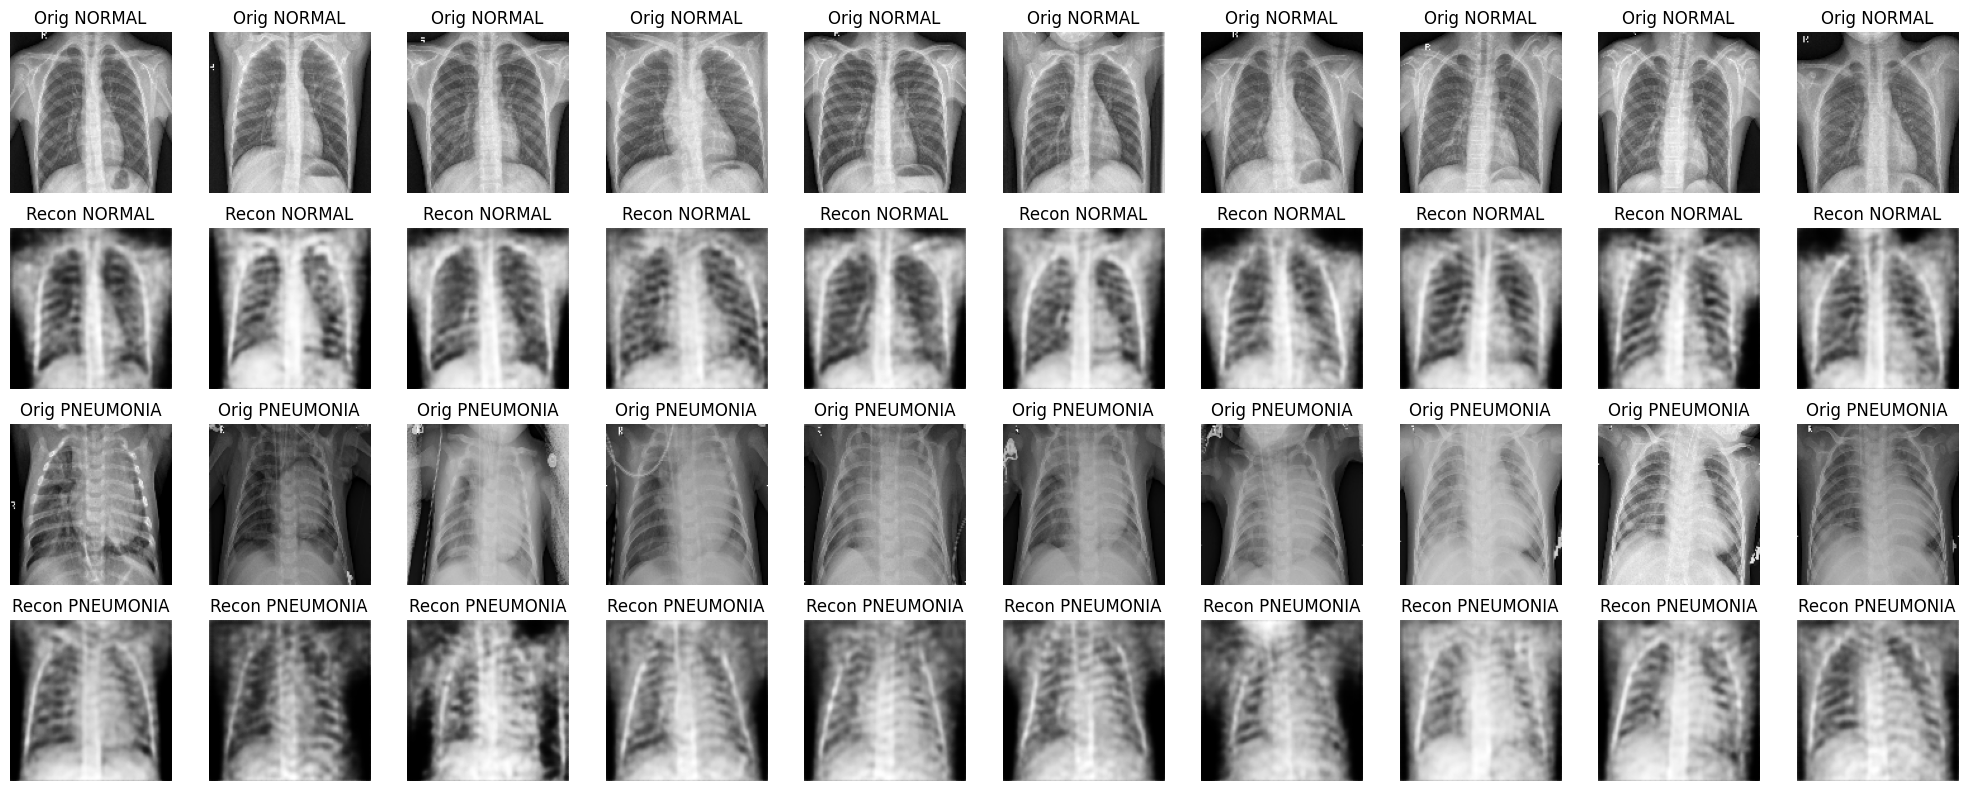

In [9]:
import matplotlib.pyplot as plt

num_images = 10
test_normal_sample = test_normal[:num_images]
test_pneumonia_sample = test_pneumonia[:num_images]

latent_vectors_normal = encoder.predict(test_normal_sample)
latent_vectors_pneumonia = encoder.predict(test_pneumonia_sample)

z_normal, mu_normal, logvar_normal = sample_latent_space(latent_vectors_normal)
z_pneumonia, mu_pneumonia, logvar_pneumonia = sample_latent_space(latent_vectors_pneumonia)

recon_normal = decoder.predict(z_normal)
recon_pneumonia = decoder.predict(z_pneumonia)

fig, axes = plt.subplots(4, num_images, figsize=(20, 8))

for i in range(num_images):
    axes[0, i].imshow(test_normal_sample[i].squeeze(), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title("Orig NORMAL")

    axes[1, i].imshow(recon_normal[i].squeeze(), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title("Recon NORMAL")

    axes[2, i].imshow(test_pneumonia_sample[i].squeeze(), cmap='gray')
    axes[2, i].axis('off')
    axes[2, i].set_title("Orig PNEUMONIA")

    axes[3, i].imshow(recon_pneumonia[i].squeeze(), cmap='gray')
    axes[3, i].axis('off')
    axes[3, i].set_title("Recon PNEUMONIA")

plt.tight_layout()
plt.show()


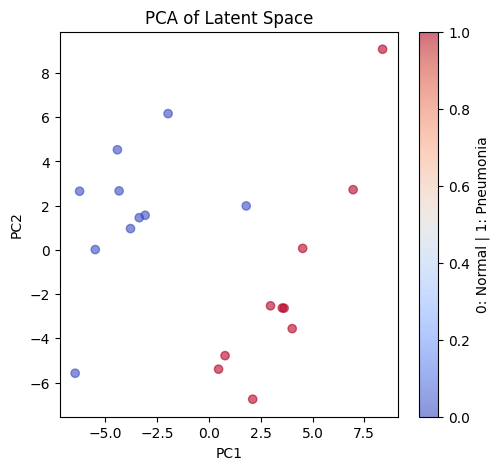

In [21]:
from sklearn.decomposition import PCA

mu, logvar = np.split(latent_vectors, 2, axis=1)

pca = PCA(n_components=2)
z_pca = pca.fit_transform(mu)

labels = np.array([0] * len(test_normal_sample) + [1] * len(test_pneumonia_sample))

# Plot PCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(z_pca[:, 0], z_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.6)
plt.colorbar(label="0: Normal | 1: Pneumonia")
plt.title("PCA of Latent Space")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

In [22]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(z_pca)

if np.mean(z_pca[cluster_labels == 0]) > np.mean(z_pca[cluster_labels == 1]):
    cluster_labels = 1 - cluster_labels  # Swap labels if needed

from sklearn.metrics import accuracy_score
print("Clustering Accuracy:", accuracy_score(labels, cluster_labels))


Clustering Accuracy: 0.95


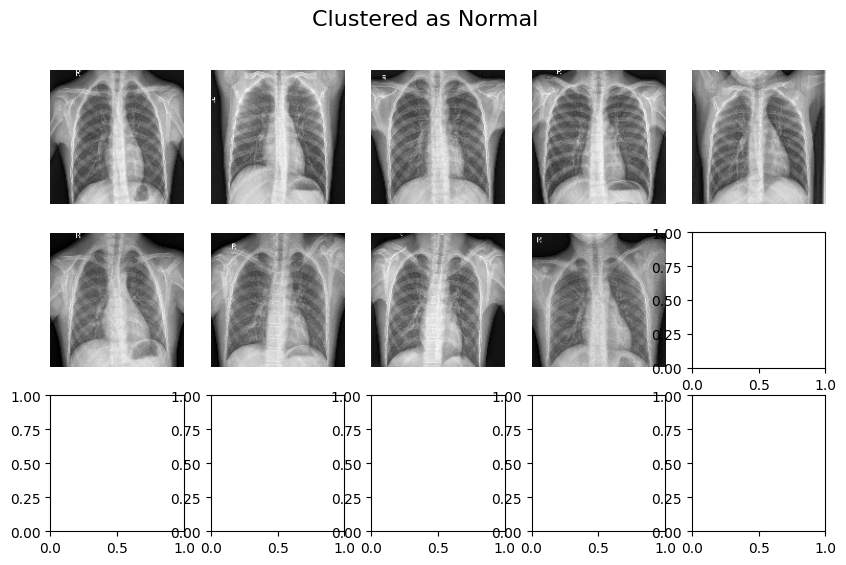

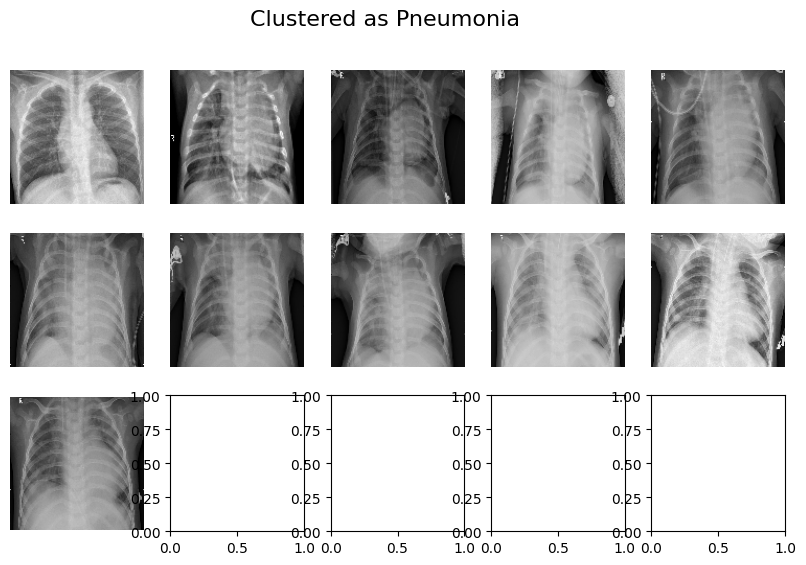

In [23]:
def plot_clustered_images(indices, title):
    fig, axes = plt.subplots(3, 5, figsize=(10, 6))
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i >= len(indices):
            break
        ax.imshow(test_images[indices[i]].squeeze(), cmap='gray')
        ax.axis('off')

    plt.show()

normal_indices = np.where(cluster_labels == 0)[0]
pneumonia_indices = np.where(cluster_labels == 1)[0]

plot_clustered_images(normal_indices, "Clustered as Normal")
plot_clustered_images(pneumonia_indices, "Clustered as Pneumonia")


In [16]:
encoder.save("anomaly_encoder2.h5")
decoder.save("anomaly_decoder2.h5")

In [8]:
encoder = tf.keras.models.load_model("anomaly_encoder2.h5")
decoder = tf.keras.models.load_model("anomaly_decoder2.h5")